# 使用Apriori算法来发现频繁项集

 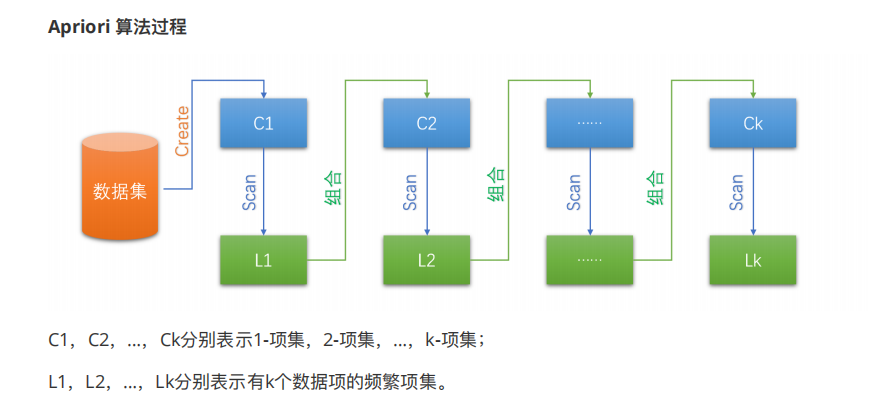

## - 函数1：创建⼀个⽤于测试的简单数据集

In [12]:
# 构建数据集 
def load_dataset():
     data_set = [[1,3,4],[2,3,5],[1,2,3,5],[2,5]]
     return data_set

'''
4条交易记录(4个事务)，每个数字代表一个商品(项)
[ 
  [1, 3, 4],
  [2, 3, 5],
  [1, 2, 3, 5],
  [2, 5]
]
'''

data_set = load_dataset()
data_set

[[1, 3, 4], [2, 3, 5], [1, 2, 3, 5], [2, 5]]

## - 函数2：构建第⼀个候选集合C1。

In [13]:
# 创建C1: 1-项集
def create_c1(data_set):
    c1 = []
    
    for data in data_set:
        for item in data:
            if item not in c1:
                c1.append(item)
    
    c1.sort()

    return  [frozenset({i}) for i in c1]

In [14]:
c1 = create_c1(data_set)
c1

[frozenset({1}),
 frozenset({2}),
 frozenset({3}),
 frozenset({4}),
 frozenset({5})]

## - 函数3：生产满足最小支持度的频繁项集L1
    - 支持度较大的就是频繁项集
    - 需要计算每个1项集的支持度

In [15]:
# C1 => L1
# 1项集 => 1频繁项集

# D: 数据集, data_set =     [[1, 3, 4], 
                          #  [2, 3, 5], 
                         #  [1, 2, 3, 5], 
                        #  [2, 5]]

# Ck： k项集， C1 =  [frozenset({1}), frozenset({2}), frozenset({3}), frozenset({4}), frozenset({5})]
# min_support：最小支持度

def scanD(D, Ck, min_support=0.1):
    # 保存每个项集出现的次数
    support_dict = { }
    
    # 遍历data_set
    for data in D:
        # 遍历Ck
        for c in Ck:
            # 如果是子集，则数量+1
            if c.issubset(data):
                support_dict[c] = support_dict.get(c, 0) + 1
    

    support_data = { }  # 所有项集的支持度
    Lk = [ ]  # k频繁项集
    
    # 计算支持度
    for k, v in support_dict.items():
        # 支持度
        support = v / len(D)
        support_data[k] = support
        
        # 找出大于最小支持度min_support的项集，作为频繁项集
        if support >= min_support:
            Lk.append(k)
    
    return Lk, support_data

In [16]:
# C1 => L1
# 1项集 => 1频繁项集
L1, support_data = scanD(data_set, c1, min_support=0.2)
# L1, support_data
display(L1)

[frozenset({1}),
 frozenset({3}),
 frozenset({4}),
 frozenset({2}),
 frozenset({5})]

In [17]:
display(support_data)

{frozenset({1}): 0.5,
 frozenset({3}): 0.75,
 frozenset({4}): 0.25,
 frozenset({2}): 0.75,
 frozenset({5}): 0.75}

In [18]:
# L1 => C2
# 1频繁项集 => 2项集
def apriori_gen(Lk):
    Ck = [ ]
    
    # 遍历Lk中的每2个元素
    for i in range(len(Lk) - 1):
        for j in range(i+1, len(Lk)):
            # k+1 项集
            f_set = Lk[i] | Lk[j]
            # 不能重复，f_set只能是k+1项集
            if f_set not in Ck and len(f_set) == len(Lk[0]) + 1:
                Ck.append(f_set)
        
    # display(Ck)
    return Ck

In [19]:
C2 = apriori_gen(L1)
C2

[frozenset({1, 3}),
 frozenset({1, 4}),
 frozenset({1, 2}),
 frozenset({1, 5}),
 frozenset({3, 4}),
 frozenset({2, 3}),
 frozenset({3, 5}),
 frozenset({2, 4}),
 frozenset({4, 5}),
 frozenset({2, 5})]

In [20]:
# C2 => L2
L2,support_data = scanD(data_set, C2, min_support=0.3)
display(L2, support_data)

[frozenset({1, 3}), frozenset({2, 3}), frozenset({3, 5}), frozenset({2, 5})]

{frozenset({1, 3}): 0.5,
 frozenset({1, 4}): 0.25,
 frozenset({3, 4}): 0.25,
 frozenset({2, 3}): 0.5,
 frozenset({3, 5}): 0.5,
 frozenset({2, 5}): 0.75,
 frozenset({1, 2}): 0.25,
 frozenset({1, 5}): 0.25}

## - 以此类推apriori()得到频繁项集的主函数

In [21]:
# 主函数: 得到频繁项集
def apriori(D, min_support=0.1):
    # 1-项集： C1
    C1 = create_c1(D)
    
    #1-项集 C1 =>  1-频繁项集  L1
    L1, supportData1 = scanD(D, C1, min_support=min_support)
    
    # 所有的频繁项集
    L = [ ]
    
    # 循环
    while True:
        L.append(L1)
        
        # 2-项集 C2
        C2 = apriori_gen(L1)

        #2-项集 C2 =>  2-频繁项集  L2
        L2, supportData2 = scanD(D, C2, min_support=min_support)
        
        # 所有项集的支持度，需要写在退出循环之前
        supportData1.update(supportData2)
        
        # 退出循环
        if len(L2) == 0:
            break
        
        L1 = L2
    
    return L, supportData1
    

In [23]:
L, support_data = apriori(data_set, min_support=0.1)
display(L, support_data)

[[frozenset({1}),
  frozenset({3}),
  frozenset({4}),
  frozenset({2}),
  frozenset({5})],
 [frozenset({1, 3}),
  frozenset({1, 4}),
  frozenset({3, 4}),
  frozenset({2, 3}),
  frozenset({3, 5}),
  frozenset({2, 5}),
  frozenset({1, 2}),
  frozenset({1, 5})],
 [frozenset({1, 3, 4}),
  frozenset({2, 3, 5}),
  frozenset({1, 2, 3}),
  frozenset({1, 3, 5}),
  frozenset({1, 2, 5})],
 [frozenset({1, 2, 3, 5})]]

{frozenset({1}): 0.5,
 frozenset({3}): 0.75,
 frozenset({4}): 0.25,
 frozenset({2}): 0.75,
 frozenset({5}): 0.75,
 frozenset({1, 3}): 0.5,
 frozenset({1, 4}): 0.25,
 frozenset({3, 4}): 0.25,
 frozenset({2, 3}): 0.5,
 frozenset({3, 5}): 0.5,
 frozenset({2, 5}): 0.75,
 frozenset({1, 2}): 0.25,
 frozenset({1, 5}): 0.25,
 frozenset({1, 3, 4}): 0.25,
 frozenset({2, 3, 5}): 0.5,
 frozenset({1, 2, 3}): 0.25,
 frozenset({1, 3, 5}): 0.25,
 frozenset({1, 2, 5}): 0.25,
 frozenset({1, 2, 3, 5}): 0.25}

## - 计算置信度：
       - confidence(X -> Y) = P(Y|X) = P(XY) / P(X)

In [24]:
# 计算置信度
# freqSet: 频繁项集
def calculate_conf(freqSet, H, supportData, brl, minConf=0.5):
    newH = [ ]
    
    # 遍历H
    for s in H:
        # 置信度
        conf = supportData[freqSet] / supportData[freqSet - s]
        # conf(3,5->1) = P(1, 3, 5) / P(3,5)  
        # display(f'--- {freqSet - s} -> {s} = {conf} ---')
        
        # 大于最小置信度的规则是强规则
        if conf >= minConf:
            # 保存强关联规则到brl中
            brl.append( (freqSet - s, "->" , s, ' = ', conf) )  
            newH.append(s)
    
    return newH

In [25]:
# 2-项集
freqSet = frozenset({1, 3})
H = [frozenset({i}) for i in freqSet]
brl = [ ]   # 保存强关联规则的列表
# display(freqSet, H)

# 计算单个项集的置信度
calculate_conf(freqSet, H, support_data, brl, minConf=0.1)

brl

[(frozenset({3}), '->', frozenset({1}), ' = ', 0.6666666666666666),
 (frozenset({1}), '->', frozenset({3}), ' = ', 1.0)]

In [26]:
# 差集
frozenset({1, 3, 5}) - frozenset({1})

frozenset({3, 5})

In [27]:
# 考虑2-项集，3-项集，4-项集...
def rules_from_freq(freqSet, H, supportData, brl, minConf=0.7):
    tmp = True
    while tmp:
        tmp = False
        
        # 计算置信度
        newH = calculate_conf(freqSet, H, supportData, brl, minConf=minConf)
        # display(f'newH: {newH}')
        
        H = apriori_gen(newH)
        # display(f'H: {H}')
        # print('*' * 100)
        
        tmp =  not  (H==[ ] or len(H[0]) == len(freqSet))

In [28]:
# 3-项集
freqSet = frozenset({1, 3, 5})
H = [frozenset({i}) for i in freqSet]
brl = [ ]   # 保存强关联规则的列表
display(freqSet, H)

rules_from_freq(freqSet, H, support_data, brl, minConf=0.4)

brl

frozenset({1, 3, 5})

[frozenset({1}), frozenset({3}), frozenset({5})]

[(frozenset({3, 5}), '->', frozenset({1}), ' = ', 0.5),
 (frozenset({1, 5}), '->', frozenset({3}), ' = ', 1.0),
 (frozenset({1, 3}), '->', frozenset({5}), ' = ', 0.5),
 (frozenset({1}), '->', frozenset({3, 5}), ' = ', 0.5)]

## -  获取强关联规则的主函数（大于最小置信度的规则）

In [30]:
# apriori() 得到频繁项集的主函数

L, support_data = apriori(data_set, min_support=0.3)
display(L)

[[frozenset({1}), frozenset({3}), frozenset({2}), frozenset({5})],
 [frozenset({1, 3}), frozenset({2, 3}), frozenset({3, 5}), frozenset({2, 5})],
 [frozenset({2, 3, 5})]]

In [34]:
# 函数：得到所有频繁项集的所有强关联规则
def gen_rules(L, support_data, min_conf=0.5):
    big_rule_list = [ ]
    
    for i in range(1, len(L)):  # 遍历所有行，第一行除外
        for freqSet in L[i]:  # 遍历每一行的所有元素
            # display(freqSet)
            H = [frozenset({i}) for i in freqSet]
            # 求每个项集的强关联规则，会保存在big_rule_list中
            rules_from_freq(freqSet, H, support_data, big_rule_list, minConf=min_conf)
    
    return big_rule_list

In [35]:
gen_rules(L, support_data, min_conf=0.8)

[(frozenset({1}), '->', frozenset({3}), ' = ', 1.0),
 (frozenset({5}), '->', frozenset({2}), ' = ', 1.0),
 (frozenset({2}), '->', frozenset({5}), ' = ', 1.0),
 (frozenset({3, 5}), '->', frozenset({2}), ' = ', 1.0),
 (frozenset({2, 3}), '->', frozenset({5}), ' = ', 1.0)]

In [36]:
data_set

[[1, 3, 4], [2, 3, 5], [1, 2, 3, 5], [2, 5]]

## 使用

In [37]:
dataset = [
    [1, 3, 4], 
    [2, 3, 5], 
    [1, 2, 3, 5], 
    [2, 5], 
    [1, 3, 5, 6, 7],
    [4, 5, 6, 7, 8],
    [8, 9, 7, 4, 2],
    [6, 7, 9, 2]
]

# 1.得到频繁项集
L, support_data = apriori(dataset, min_support=0.2)  
# 2.得到强关联规则
rules = gen_rules(L, support_data, min_conf=0.7)
rules

[(frozenset({3}), '->', frozenset({1}), ' = ', 0.75),
 (frozenset({1}), '->', frozenset({3}), ' = ', 1.0),
 (frozenset({3}), '->', frozenset({5}), ' = ', 0.75),
 (frozenset({7}), '->', frozenset({6}), ' = ', 0.75),
 (frozenset({6}), '->', frozenset({7}), ' = ', 1.0),
 (frozenset({8}), '->', frozenset({4}), ' = ', 1.0),
 (frozenset({8}), '->', frozenset({7}), ' = ', 1.0),
 (frozenset({9}), '->', frozenset({2}), ' = ', 1.0),
 (frozenset({9}), '->', frozenset({7}), ' = ', 1.0),
 (frozenset({2, 3}), '->', frozenset({5}), ' = ', 1.0),
 (frozenset({1, 5}), '->', frozenset({3}), ' = ', 1.0),
 (frozenset({5, 7}), '->', frozenset({6}), ' = ', 1.0),
 (frozenset({5, 6}), '->', frozenset({7}), ' = ', 1.0),
 (frozenset({4, 7}), '->', frozenset({8}), ' = ', 1.0),
 (frozenset({7, 8}), '->', frozenset({4}), ' = ', 1.0),
 (frozenset({4, 8}), '->', frozenset({7}), ' = ', 1.0),
 (frozenset({8}), '->', frozenset({4, 7}), ' = ', 1.0),
 (frozenset({2, 7}), '->', frozenset({9}), ' = ', 1.0),
 (frozenset({7, 